# **Data Analysis of the Growth of Self Employment**
Name: Goh Pin Pin Isaac<br>
Admin Number : P2317623<br>
Class: DAAA/FT/1B/07<br>
Module Code: ST1510 Programming for Data Analytics
<br><br>
<hr>

## **Background Info**
With all the chaos in the world, from recent pandemic to the life changing technology, it has cause a sudden rise in Self-Employment Rates.<br>
`The share of self-employed in the resident workforce rose in June 2020 to 14.7%, from 13.5% in June 2019.` - Quoted from an Article from the Ministry of Manpower.<br>
However, it seems to fluctuate a lot which makes it volatile.<br>

Mr Lee is in Ministry of Manpower and is given the task of stabilizing the self-employment rates as it benefits the government. <br>
Benefits of Self-Employment on the Government:
- *Generating Tax Revenue*
    - The **more** self-employed workers, the more tax we can **collect**! Which is crucial for funding public services and infrastructure projects.
- *Reduce Unemployment*
    - Individuals who lose traditional employment may turn to self-employment opportunities, helping to **mitigate unemployment rates**.

Source: https://stats.mom.gov.sg/iMAS_PdfLibrary/mrsd_2020LabourForce_survey_findings.pdf<br>
Source: https://www.researchgate.net/publication/254387919_The_Economic_Impacts_of_Self-Employment
<br><br>
<hr>

## **Mr Lee's Mission**
- Find out the cause of this **Rise** & **Fluctuation** in Self-Employment Rates
- Pitch a solution after the research to **Stabilize** the Rate
<br><br>
<hr>

## **List of Sources:**
- Datasets
    - [PercentageSelfEmployed(Total)](https://data.worldbank.org/indicator/SL.EMP.SELF.ZS?end=2021&locations=SG&start=1991&view=chart)
    - [Wellbeing Dataset](https://www.authentic-happiness.com/your-life-satisfaction-score)
    - [Motivations for Physical Activity](https://beta.data.gov.sg/collections/1628/view)

# Importing Libraries and Datasets

In [1]:
# Data Minipulation
import pandas as pd
import numpy as np

# Plotting
import seaborn as sns
from matplotlib import pyplot as plt

# StatsModel
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Others
import warnings
warnings.filterwarnings("ignore")

motivation = pd.read_csv('./datasets/MotivationstoParticipateinSportPhysicalActivity2021.csv')
selfEmployTotal = pd.read_csv('./datasets/PercentageTotalSelfEmployment.csv')
wellbeing = pd.read_csv('./datasets/WellBeing.csv')

C:\Users\pinpi\AppData\Local\Temp\ipykernel_20816\1179337548.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Setting Style to Graphs

In [2]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.set(rc={'figure.figsize':(12,12)})

# Dataset Breakdown - **Dataset 1** (WellBeing Survy on Work LifeStyle)

The Dataset is very big, but with NO Null Values
<br><br>
<hr>

### **Features Focusing On**
- Timestamp - Date when survey was completed
- FRUITS_VEGGIES - Vegetables eaten (Daily)
- DAILY_STRESS - Number of Stress (Daily)
- PLACES_VISITED - New Places Visited
- CORE_CIRCLE - People Close To
- SUPPORTING_OTHERS - Number of poeple helped achieved in life
- SOCIAL_NETWORK - Number of people interacted with (Daily)
- ACHIEVEMENT - Number of Achievements Proud of
- DONATION - Number of Times Donated Time/Money to Good Cause
- BMI_RANGE - Body Mass Index (BMI) Range?
- TODO_COMPLETED - Number of Tasks Completed (Weekly)
- FLOW - Number of times with FULL concentration
- DAILY_STEPS - Number of Steps (per 1000) taken (Daily)
- LIVE_VISION - length (Years) See yourself in the future clearly
- SLEEP_HOURS - Number of Hours of Sleep (Hrs)
- LOST_VACATION - Missed Vacation Trips (Year)
- DAILY_SHOUTING - Shout / Sulk at someone (Daily)
- SUFFICIENT_INCOME - (Insufficient[1]) (Sufficient[2])
- PERSONAL_AWARDS - Recognition received in Life
- TIME_FOR_PASSION - Number of Hours on Passion/Hobbie (Hrs)
- WEEKLY_MEDITATION - Number of Meditations (Weekly)
- AGE - Age Range
- GENDER - Male / Female
- EMPLOYMENT_STATUS - Self-Employed / Employed
- WORK_LIFE_BALANCE_SCORE - SCORE CALCULATED BY [AUTHENTIC-HAPPINESS.COM](https://www.authentic-happiness.com/your-life-satisfaction-score) ALGORITHM<br><br>
<hr>

### Feature Engineering (For Joining with Motivation Dataset)
- **Simplifying AGE**
    - STUDENT - `Less than 20` 
    - ADULT - `21 to 35 & 36 to 50` 
    - SENIOR - `Less than 20` 
<br> <br> 
<hr>

In [23]:
# ========== Importing Dataset ==========
wellbeing = pd.read_csv('./datasets/WellBeing.csv')

# ========== Feature Engineering (Simplifying [AGE]) ==========
wellbeing.loc[wellbeing["AGE"] == "Less than 20", ['AGE']] = "STUDENT"
wellbeing.loc[pd.Series(wellbeing["AGE"] == "21 to 35") | pd.Series(wellbeing["AGE"] == "36 to 50"), ['AGE']] = "ADULT"
wellbeing.loc[wellbeing["AGE"] == "51 or more", ['AGE']] = "SENIOR"

# ========== Splitting Data Into (Self-Employed) / (Employed) ==========
selfEmployed = wellbeing[wellbeing['EMPLOYMENT_STATUS'] == "SELF-EMPLOYED"]
Employed = wellbeing[wellbeing['EMPLOYMENT_STATUS'] == "EMPLOYED"]

In [4]:
print(wellbeing.info(),end='\n\n')
print('Number of unique values in each feature')
for col in wellbeing:
    print(f'\t- {len(wellbeing[col].unique())} \tunique values in {col}')
wellbeing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000
mean,2.922677,5.232970,5.508077,5.616454,6.474267,4.000751,2.715314,1.410656,5.745993,3.194778,5.703606,3.752129,7.042888,2.898886,2.930879,1.728963,5.711558,3.326572,6.233346,666.751503
std,1.442694,3.311912,2.840334,3.242021,3.086672,2.755837,1.851586,0.491968,2.624097,2.357518,2.891013,3.230987,1.199044,3.692180,2.676301,0.444509,3.089630,2.729293,3.016571,45.019868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,636.000000
50%,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,3.000000,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,667.700000
75%,4.000000,8.000000,8.000000,10.000000,10.000000,6.000000,5.000000,2.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


# Dataset Breakdown - **Dataset 2** (World Self Employment Rate)
This Dataset is not only big but Contains a TON of Null values
<hr>

### Features Focusing On
- Country Name
- Date
- Percentage<br><br>
<hr>

In [10]:
# ========== Importing Dataset ==========
selfEmployTotal = pd.read_csv('./datasets/PercentageTotalSelfEmployment.csv')

# ========== Dropping unwanted features ==========
selfEmployTotal.drop(['Country Code','Indicator Name','Indicator Code'],axis=1,inplace=True)

# ========== Reformat the Dataset (Melt & Pivot_tabl) ==========
selfEmployTotal = selfEmployTotal.melt(id_vars=["Country Name"], var_name="Date", value_name="Percentage")
selfEmployTotal = selfEmployTotal.pivot_table(index='Date',columns='Country Name', values='Percentage')

# ========== Setting DateRange (2015-2021) ==========
dataRange = [str(i) for i in range(2015,2022)]
selfEmployTotal = selfEmployTotal.loc[dataRange]

In [6]:
print(selfEmployTotal.info(),end='\n\n')
print('Number of unique values in each feature')
for col in selfEmployTotal:
    print(f'\t- {len(selfEmployTotal[col].unique())} \tunique values in {col}')
selfEmployTotal.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 2015 to 2021
Columns: 235 entries, Afghanistan to Zimbabwe
dtypes: float64(235)
memory usage: 12.9+ KB
None

Number of unique values in each feature
	- 7 	unique values in Afghanistan
	- 7 	unique values in Africa Eastern and Southern
	- 7 	unique values in Africa Western and Central
	- 7 	unique values in Albania
	- 7 	unique values in Algeria
	- 7 	unique values in Angola
	- 7 	unique values in Arab World
	- 7 	unique values in Argentina
	- 7 	unique values in Armenia
	- 7 	unique values in Australia
	- 7 	unique values in Austria
	- 7 	unique values in Azerbaijan
	- 7 	unique values in Bahamas, The
	- 7 	unique values in Bahrain
	- 7 	unique values in Bangladesh
	- 7 	unique values in Barbados
	- 7 	unique values in Belarus
	- 7 	unique values in Belgium
	- 7 	unique values in Belize
	- 7 	unique values in Benin
	- 7 	unique values in Bhutan
	- 7 	unique values in Bolivia
	- 7 	unique values in Bosnia and Herzegovina
	- 7 	uniq

Country Name,Afghanistan,Africa Eastern and Southern,Africa Western and Central,Albania,Algeria,Angola,Arab World,Argentina,Armenia,Australia,...,Uzbekistan,Vanuatu,"Venezuela, RB",Viet Nam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
count,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,83.537720,73.420026,80.781479,55.925869,31.463101,64.425574,30.110654,25.989599,36.579494,16.730576,...,46.938603,67.830117,38.639326,56.570953,10.320816,29.298859,47.214749,54.955153,76.753927,67.201119
std,0.920432,0.434667,0.554199,2.280408,0.539176,1.239954,0.947842,1.502846,5.086251,0.264355,...,0.550905,0.703508,2.723518,2.464461,0.636668,1.569590,0.605446,2.055540,0.816936,0.892936
min,82.450410,72.981002,79.797963,53.045490,30.525890,63.105980,29.404968,24.147220,30.569130,16.456460,...,46.381670,66.865550,34.925710,53.655820,9.787870,27.099450,46.556009,51.459570,75.423850,66.310980
25%,82.883535,73.083800,80.564615,54.219780,31.217705,63.467660,29.462513,25.071070,32.408325,16.524720,...,46.528770,67.388575,36.911265,54.860015,9.848835,28.124855,46.780845,53.896055,76.387065,66.570345
50%,83.404050,73.359680,80.811874,55.480880,31.558710,64.104940,29.951838,25.528830,35.583960,16.601560,...,46.728930,67.768540,38.884990,56.055650,10.133740,29.579560,47.036339,55.484570,76.740910,66.610870
75%,84.159233,73.663630,81.167272,57.851375,31.806765,65.284425,30.192879,26.753580,41.144355,16.974335,...,47.281530,68.261900,40.562825,57.952560,10.663295,30.401415,47.553746,56.353110,77.236620,67.891710
max,84.846820,74.104642,81.396739,58.812400,32.108170,66.263930,32.106986,28.601840,42.798010,17.057900,...,47.839020,68.875780,41.716400,60.660050,11.299840,31.360460,48.241711,57.243600,77.865360,68.561870


# Dataset Breakdown - **Dataset 3** (Motivation to Participate in Sport / Physical Activity)
This Dataset is not only big but Contains a TON of Null values
<hr>

### Features Focusing On
- Country Name
- Date
- Percentage<br><br>
<hr>

### Feature Engineering (For Joining with Wellbeing Dataset)
- **Modifying AGE**
    - STUDENT - `Students_13to24` 
    - ADULT - `WorkingAdults_20to59` 
    - SENIOR - `Seniors_60+` 
<br> <br> 
<hr>

In [7]:
# ========== Importing Dataset ==========
motivation = pd.read_csv('./datasets/MotivationstoParticipateinSportPhysicalActivity2021.csv')

# ========== Feature Engineering (Simplifying [AGE]) ==========
motivation.loc[motivation["target"] == "Students_13to24", ['target']] = "STUDENT"
motivation.loc[motivation["target"] == "WorkingAdults_20to59", ['target']] = "ADULT"
motivation.loc[motivation["target"] == "Seniors_60+", ['target']] = "SENIOR"

# ========== Set Index of Dataset ==========
motivation.set_index('target',inplace=True)

In [8]:
print(motivation.info(),end='\n\n')
print('Number of unique values in each feature')
for col in motivation:
    print(f'\t- {len(motivation[col].unique())} \tunique values in {col}')
motivation.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Overall to SENIOR
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   betterhealth    4 non-null      int64
 1   mental          4 non-null      int64
 2   feelgood        4 non-null      int64
 3   interest        4 non-null      int64
 4   makeupsitting   4 non-null      int64
 5   facilitiesnear  4 non-null      int64
 6   meetpeople      4 non-null      int64
 7   distract        4 non-null      int64
 8   exerciseathome  4 non-null      int64
 9   developskills   4 non-null      int64
dtypes: int64(10)
memory usage: 352.0+ bytes
None

Number of unique values in each feature
	- 4 	unique values in betterhealth
	- 3 	unique values in mental
	- 3 	unique values in feelgood
	- 4 	unique values in interest
	- 3 	unique values in makeupsitting
	- 4 	unique values in facilitiesnear
	- 2 	unique values in meetpeople
	- 3 	unique values in distract
	- 4 	unique va

,betterhealth,mental,feelgood,interest,makeupsitting,facilitiesnear,meetpeople,distract,exerciseathome,developskills
count,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.0,4.000000,4.000000,4.000000
mean,80.750000,33.000000,26.500000,29.000000,10.75000,10.250000,8.5,5.750000,6.500000,4.500000
std,6.551081,4.898979,8.660254,20.944371,3.40343,2.217356,3.0,1.258306,5.066228,5.802298
min,73.000000,29.000000,14.000000,8.000000,8.00000,8.000000,7.0,4.000000,3.000000,0.000000
25%,78.250000,29.000000,25.250000,20.000000,8.00000,8.750000,7.0,5.500000,3.750000,1.500000
50%,80.500000,32.000000,29.000000,25.000000,10.00000,10.000000,7.0,6.000000,4.500000,2.500000
75%,83.000000,36.000000,30.250000,34.000000,12.75000,11.500000,8.5,6.250000,7.250000,5.500000
max,89.000000,39.000000,34.000000,58.000000,15.00000,13.000000,13.0,7.000000,14.000000,13.000000


<hr>

# Graph 1 **(Line graph)** - Rate of Self-Employment (%) over a Time Period

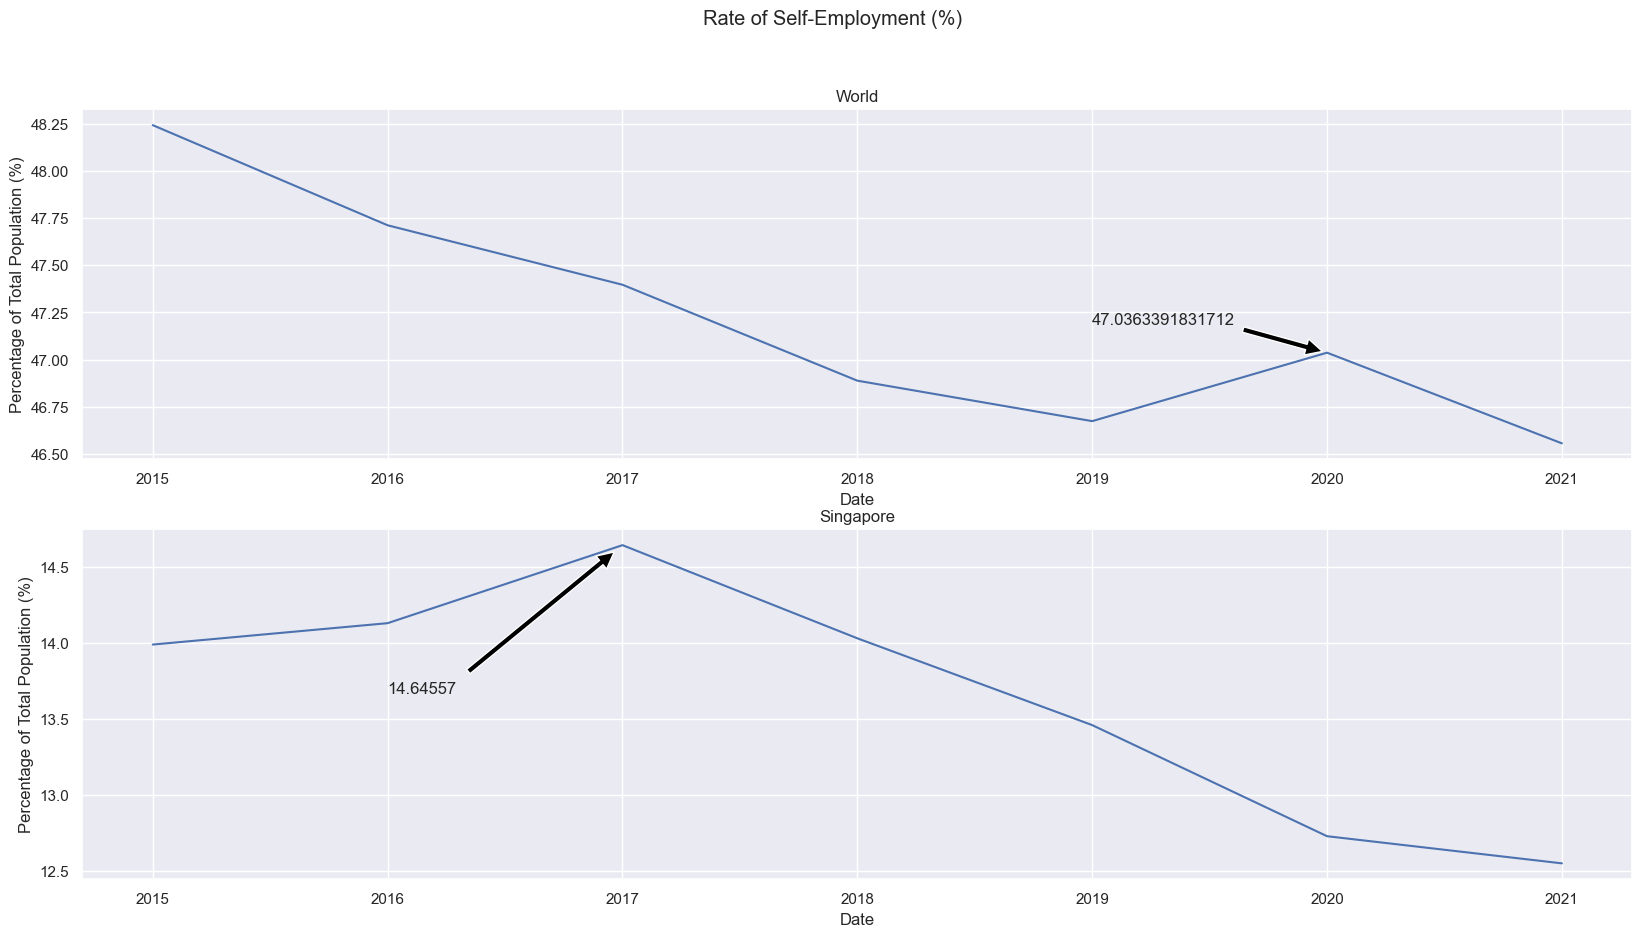

In [9]:
fig, axes = plt.subplots(2,1,figsize=(20, 10))

# Main Title
fig.suptitle('Rate of Self-Employment (%)')

# Indivisual Title
axes[0].set_title('World')
axes[1].set_title('Singapore')

# Naming Axis
axes[0].set(ylabel='Percentage of Total Population (%)')
axes[1].set(ylabel='Percentage of Total Population (%)')

# Plotting Graphs
sns.lineplot(selfEmployTotal["World"].to_frame(), x="Date", y="World",ax=axes[0])
sns.lineplot(selfEmployTotal["Singapore"].to_frame(), x="Date", y="Singapore",ax=axes[1])

# Annotation
axes[0].annotate(f'{selfEmployTotal["World"]["2020"]}', xy=("2020",selfEmployTotal["World"]["2020"]), xycoords='data',
            xytext=("2019",47.25), textcoords='data',
            va='top', ha='left',
            arrowprops=dict(facecolor='black', shrink=0.05))
axes[1].annotate(f'{selfEmployTotal["Singapore"]["2017"]}', xy=("2017",selfEmployTotal["Singapore"]["2017"]), xycoords='data',
            xytext=("2016",13.75), textcoords='data',
            va='top', ha='left',
            arrowprops=dict(facecolor='black', shrink=0.05))

# Plot Graphs
plt.show()

#### <u>**Conclusion**</u>
- WORLD
    - Decrease, but suddenly increased at 2020
    - Could be Due to the recent pandemic **(COVID-19)**
- SINGAPORE
    - Rose from 2015-2017, but dropped since
    - MySkillFuture started at 2015

<u>**Questions**</u>
- Why did it drop after?

<u>**Sources**</u>
- [**MySkillFuture**](https://www.myskillsfuture.gov.sg/content/portal/en/header/faqs/skillsfuture-credit.html)
- [**COVID-19**](https://en.wikipedia.org/wiki/COVID-19_pandemic)

<hr>

# Graph 2 **(Bar graph)** - The Correlation With Work-Life Balance (Self-Employed VS Employed)

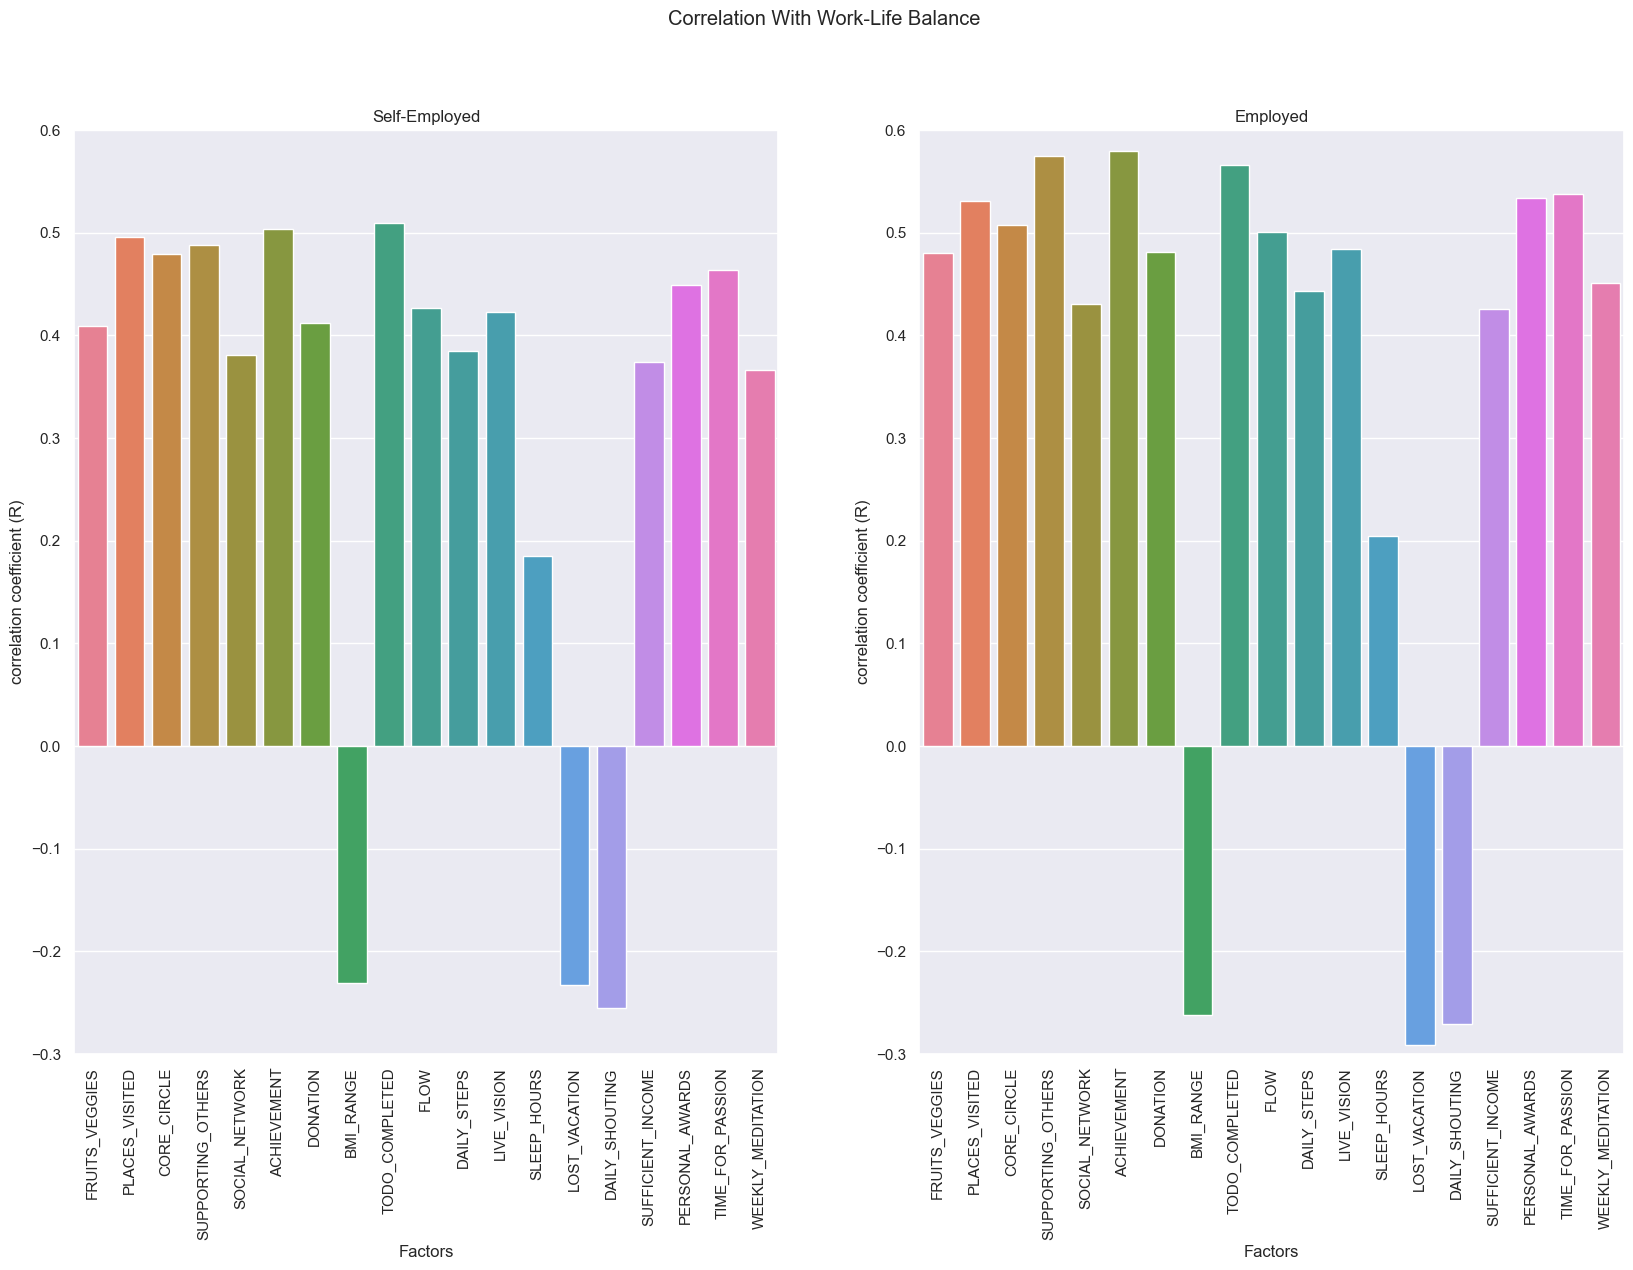

In [10]:
# Gathering all Numeric Coloumns
numeric_Values = [
        'FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 
        'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE', 
        'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS', 
        'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS',
        'TIME_FOR_PASSION', 'WEEKLY_MEDITATION','WORK_LIFE_BALANCE_SCORE']
NumSelfEmployed = selfEmployed[numeric_Values]
NumEmployed = Employed[numeric_Values]

# Creating Corrilation DataFrame from Self-Employed
NumSelfEmployed_corr = NumSelfEmployed.corr()
NumSelfEmployed_corr.index.name = 'Factors'
NumSelfEmployed_corr.reset_index(inplace=True)
NumSelfEmployed_corr = NumSelfEmployed_corr.drop([19])

# Creating Corrilation DataFrame from Employed
NumEmployed_corr = NumEmployed.corr()
NumEmployed_corr.index.name = 'Factors'
NumEmployed_corr.reset_index(inplace=True)
NumEmployed_corr = NumEmployed_corr.drop([19])

# Plotting SubPlots
fig, axes = plt.subplots(1,2,figsize=(20,12))
fig.suptitle('Correlation With Work-Life Balance')              # Main Title
axes[0].set_title('Self-Employed')
axes[1].set_title('Employed')

sns.barplot(data=NumSelfEmployed_corr, x='Factors', y="WORK_LIFE_BALANCE_SCORE",palette="husl", ax=axes[0])
axes[0].set_ylabel("correlation coefficient (R)")
axes[0].set_ylim(-0.3, 0.6)
axes[0].set_xticklabels(labels=[
        'FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS',
        'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE',
        'TODO_COMPLETED', 'FLOW',  'DAILY_STEPS', 'LIVE_VISION', 
        'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 
        'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION'], rotation=90)

sns.barplot(data=NumEmployed_corr, x='Factors', y="WORK_LIFE_BALANCE_SCORE",palette="husl", ax=axes[1])
axes[1].set_ylabel("correlation coefficient (R)")
axes[1].set_ylim(-0.3, 0.6)
axes[1].set_xticklabels(labels=[
        'FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS',
        'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE',
        'TODO_COMPLETED', 'FLOW',  'DAILY_STEPS', 'LIVE_VISION', 
        'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 
        'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION'], rotation=90)

fig.show()

#### <u>**Conclusion**</u>
- Self-Employed
    - **TODO COMPLETED** has the highest relationship with **WORK_LIFE_BALANCE_SCORE**
- Employed
    - **ACHIEVEMENT** has the highest relationship with **WORK_LIFE_BALANCE_SCORE**

<hr>

# Graph 3 **(Boxplot)** - The Distribution of Self Employed VS Employed against WORK_LIFE_BALANCE_SCORE
Find out Which has a better WORK_LIFE_BALANCE_SCORE

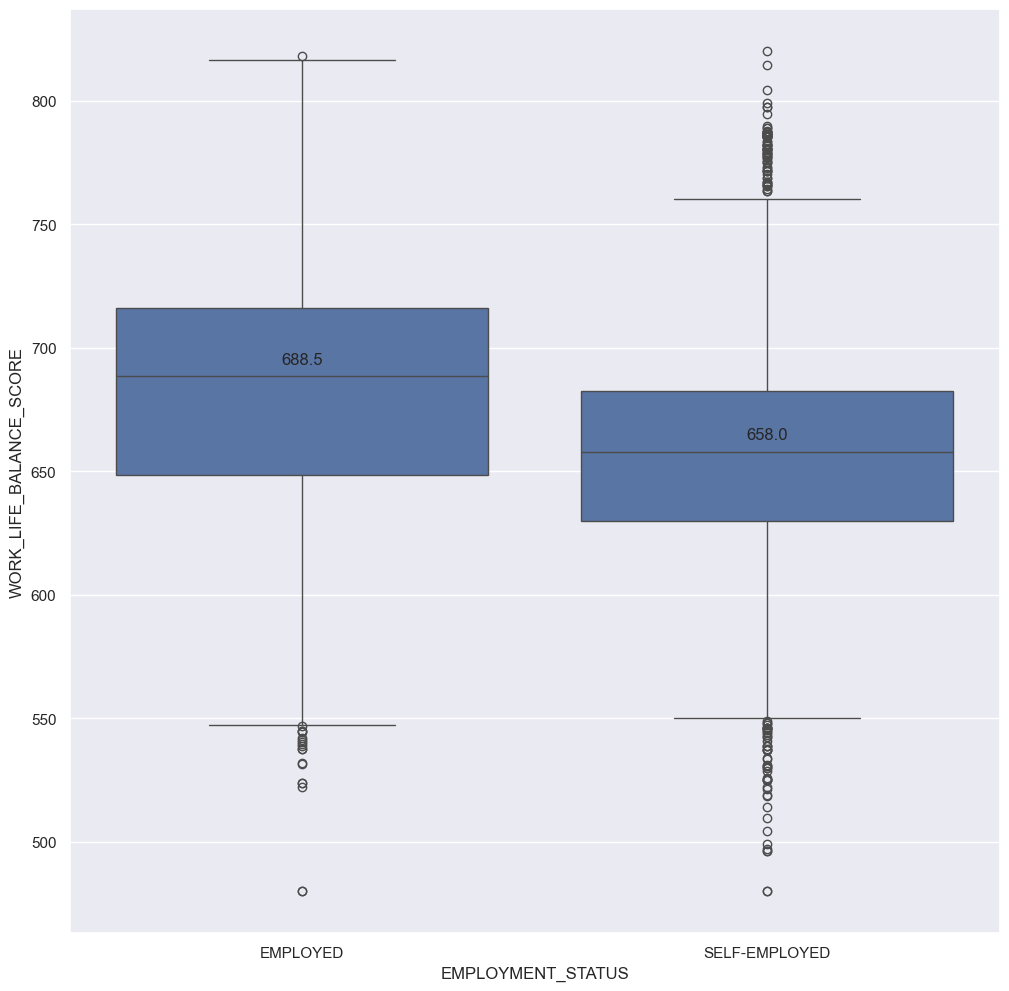

In [11]:
# Medians
medians = wellbeing.groupby("EMPLOYMENT_STATUS")["WORK_LIFE_BALANCE_SCORE"].median()

# Plotting
box = sns.boxplot(data=wellbeing, x="EMPLOYMENT_STATUS", y="WORK_LIFE_BALANCE_SCORE")

# Annotate
for i in range(len(medians)):
    box.annotate(str(medians[i]), xy = (i, medians[i]+5), horizontalalignment = 'center')

plt.show()

#### <u>**Conclusion**</u>
- Self-Employed
    - More Outliers
    - Mean is Less than Employed
- Employed
    - Less Outliers
    - Generally Better Score then Self-Employed

<u>**Reasons**</u>

- **DO before THINK habit.**
    - This would lead to rash decisions where they become self-employed but its not for them.
- **NEW Trend**
    - people are still figuring how to manage. Thats why theres so many outliers as everyone is different

<hr>

# Graph 4 **(Bar Chart)** - The Difference between the Mean of all the Factors
Find out Which Factors causes Employed to score better than Self-Employed

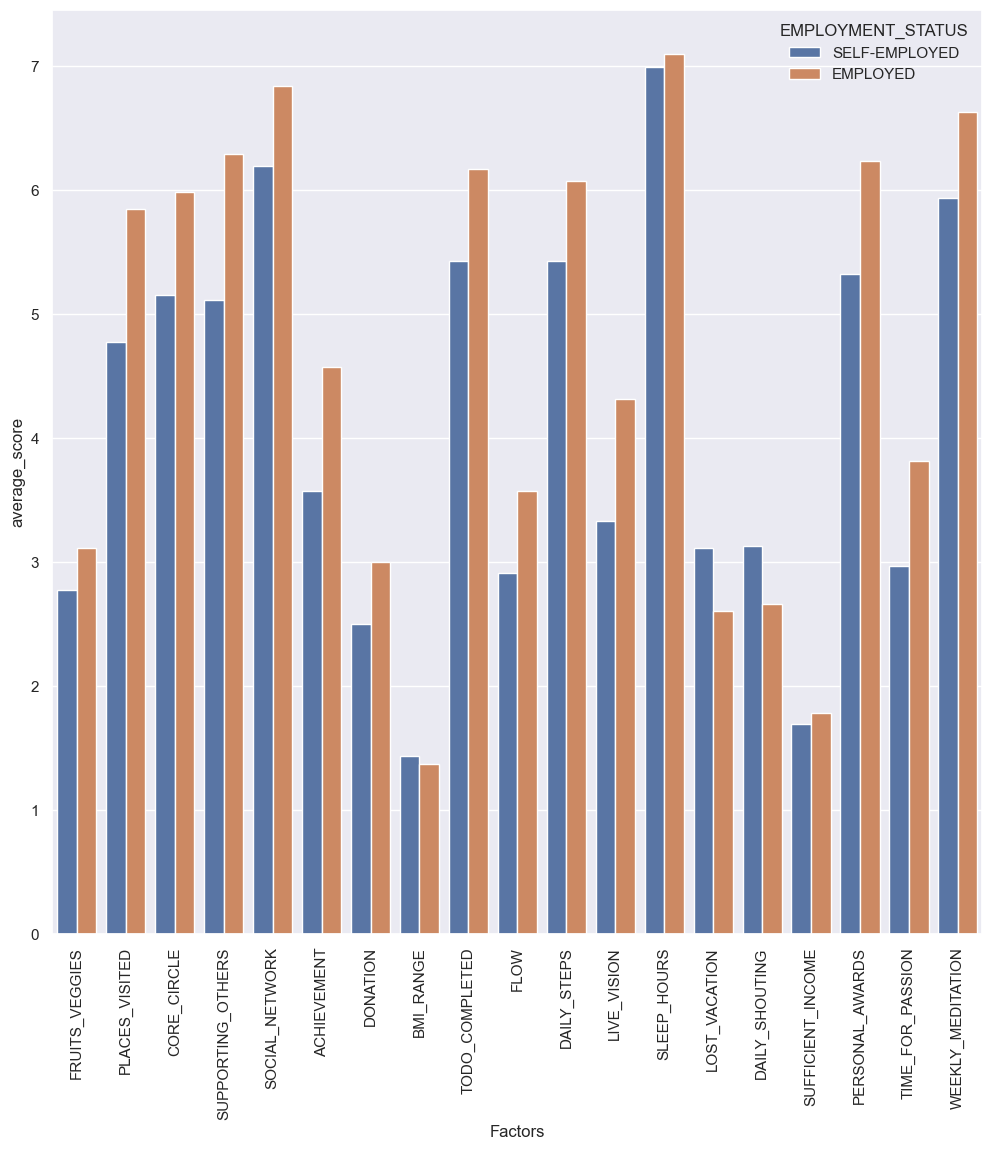

In [12]:
# Getting Numeric Data 
df_answers = wellbeing[[
        'FRUITS_VEGGIES', 'PLACES_VISITED',
        'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
        'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
        'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
        'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
        'WEEKLY_MEDITATION', 'EMPLOYMENT_STATUS']]

# Self-Employed
df_answers_selfEmployed = df_answers.loc[df_answers["EMPLOYMENT_STATUS"]=="SELF-EMPLOYED"]
df_answers_selfEmployed = df_answers_selfEmployed.drop('EMPLOYMENT_STATUS', axis=1)

# Employed
df_answers_Employed = df_answers.loc[df_answers["EMPLOYMENT_STATUS"]=="EMPLOYED"]
df_answers_Employed = df_answers_Employed.drop('EMPLOYMENT_STATUS', axis=1)

# Mean of the Answers
df2 = df_answers_selfEmployed.mean(axis=0)
df3 = df_answers_Employed.mean(axis=0)
result = pd.concat([df2, df3], axis=1, join="inner")
result.index.name = 'Factors'
result.reset_index(inplace=True)

# Formating Result
result = result.rename(columns={0: 'SELF-EMPLOYED', 1: 'EMPLOYED'})
result2 = pd.melt(result, id_vars = ['Factors'], value_vars=['SELF-EMPLOYED','EMPLOYED'], var_name='EMPLOYMENT_STATUS', value_name='average_score')

# Plotting
plot = sns.barplot(data=result2, x='Factors', y='average_score',hue="EMPLOYMENT_STATUS")
plot.set_xticklabels(
    labels=[
        'FRUITS_VEGGIES', 'PLACES_VISITED',
        'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
        'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
        'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
        'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
        'WEEKLY_MEDITATION'], rotation=90)
plt.show()

#### <u>**Conclusion**</u>
- **Highest Difference**
    - SUPPORTING_OTHERS
    - PLACES_VISITED
    - ACHIEVEMENT

### **Better Visualization**

In [13]:
result['DIFFERENCE'] = abs(result["SELF-EMPLOYED"] - result["EMPLOYED"])
display(result.drop(['SELF-EMPLOYED','EMPLOYED'],axis=1).sort_values(by='DIFFERENCE', ascending=False).style.background_gradient(cmap="Blues"))

,Factors,DIFFERENCE
3,SUPPORTING_OTHERS,1.181752
1,PLACES_VISITED,1.071606
5,ACHIEVEMENT,1.003588
11,LIVE_VISION,0.987422
16,PERSONAL_AWARDS,0.911498
17,TIME_FOR_PASSION,0.846489
2,CORE_CIRCLE,0.835227
8,TODO_COMPLETED,0.735540
18,WEEKLY_MEDITATION,0.696198
9,FLOW,0.658028


<hr>

# **🔍Research!🔍**
Engaging in regular physical activity, such as taking more steps throughout the day, has been consistently linked to improved work life wellbeing. <br>
As individuals integrate more steps into their daily routines, they not only enhance their physical health but also experience positive effects on their mental well-being.  <br>
Regular movement has been shown to reduce stress, anxiety, and depression, fostering a more positive and resilient mindset crucial for navigating the demands of a work environment.  <br>
Additionally, increased physical activity is associated with better cognitive function and creativity, contributing to enhanced problem-solving skills and overall job performance.  <br>
Taking more steps is not only a practical way to incorporate exercise into a busy schedule but also serves as a powerful tool for maintaining a healthy work-life balance, fostering a holistic sense of well-being that extends beyond the professional realm.

<u>**Question**</u>
- Does Daily Steps really increase your work life wellbeing?

<u>**Source**</u>
- https://www.health.com/how-many-steps-to-improve-health-8399836

<hr>

# **Linear Regression** - Predict the **WORK_LIFE_BALANCE_SCORE** base on **DAILY_STEPS**

In [14]:
daily_steps = selfEmployed["DAILY_STEPS"]
daily_steps = sm.add_constant(daily_steps)
linearModel = sm.OLS(selfEmployed["WORK_LIFE_BALANCE_SCORE"],daily_steps).fit()
print(linearModel.summary())

                               OLS Regression Results                              
Dep. Variable:     WORK_LIFE_BALANCE_SCORE   R-squared:                       0.148
Model:                                 OLS   Adj. R-squared:                  0.148
Method:                      Least Squares   F-statistic:                     1593.
Date:                     Tue, 06 Feb 2024   Prob (F-statistic):          2.20e-321
Time:                             09:47:10   Log-Likelihood:                -46216.
No. Observations:                     9179   AIC:                         9.244e+04
Df Residuals:                         9177   BIC:                         9.245e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------


#### <u>**Conclusion**</u>
- **R-squared & Adj. R-squared (0.148)**
    - Many Outliers (Not a good fit)
- **Regression formula**
    - WORK_LIFE_BALANCE_SCORE - 5.4074(DAILY_STEPS) + 626.4334
- **coef of DAILY_STEPS**
    - coef is positive (5.4074 > 0)
    - This means theres an Increasing Relationship with WORK_LIFE_BALANCE_SCORE 
    - More Steps = Better Score
- **F-statistic & P-Value**
    - Significant Model
        - High F-statistic (1593)
        - Low P-Value (2.20e-321)
- **Number of Trials (9179)**
- **Method: Least Squares**

<hr>

# Graph 5 **(Regression Plot)** - The Relationshop between **WORK_LIFE_BALANCE_SCORE** VS **DAILY_STEPS**

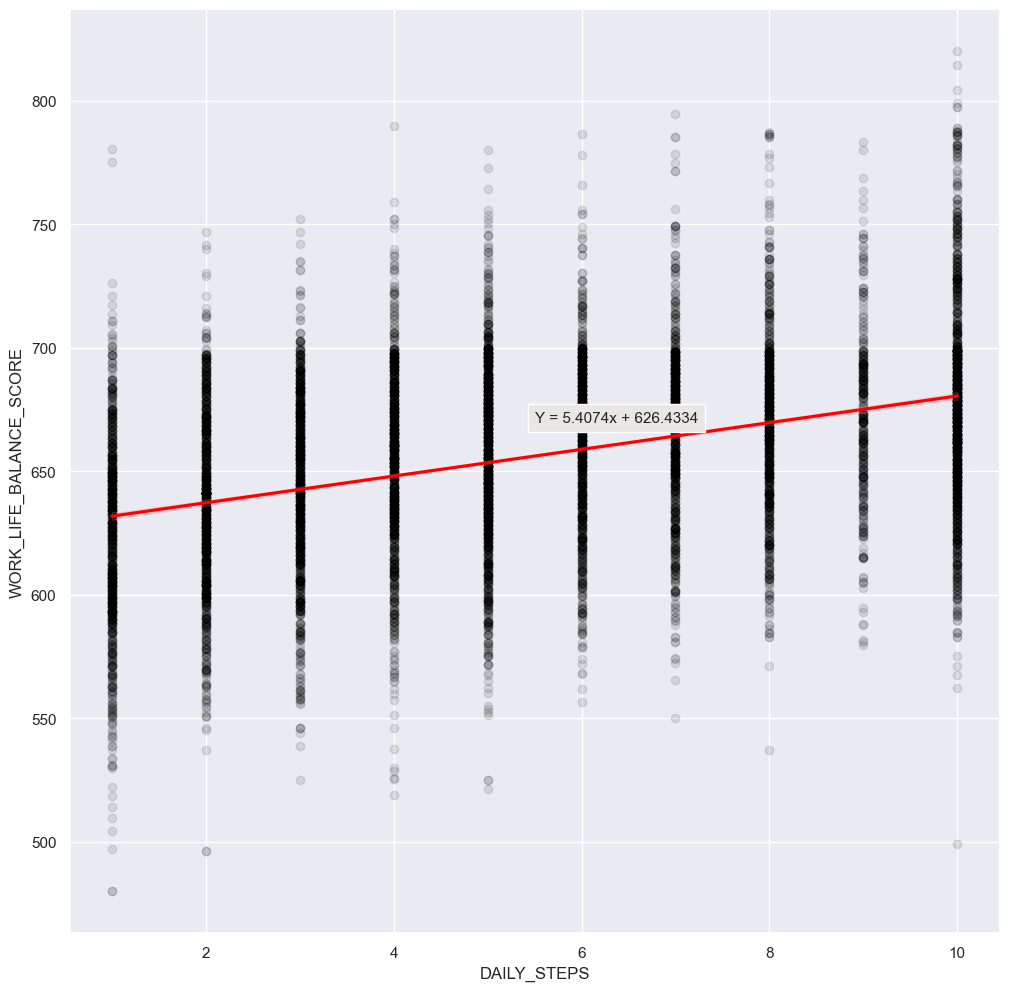

In [15]:
yoo = sns.regplot(x = "DAILY_STEPS", y = "WORK_LIFE_BALANCE_SCORE", 
            data = selfEmployed,
            scatter_kws = {"color": "black", "alpha": 0.1},
            line_kws = {"color": "red"})
yoo.text(5.5,670,
            f'Y = 5.4074x + 626.4334',
            fontsize=11,
            bbox={'facecolor':'#E8E7E5', 'alpha':1, 'pad':5})
plt.show()

#### <u>**Conclusion**</u>
- Increasing Relationship with WORK_LIFE_BALANCE_SCORE 
- More Steps = Better Score

<hr>

# Graph 6/7 **(Histogram / Q-Q Plot)** - Assess the validity of regession plot

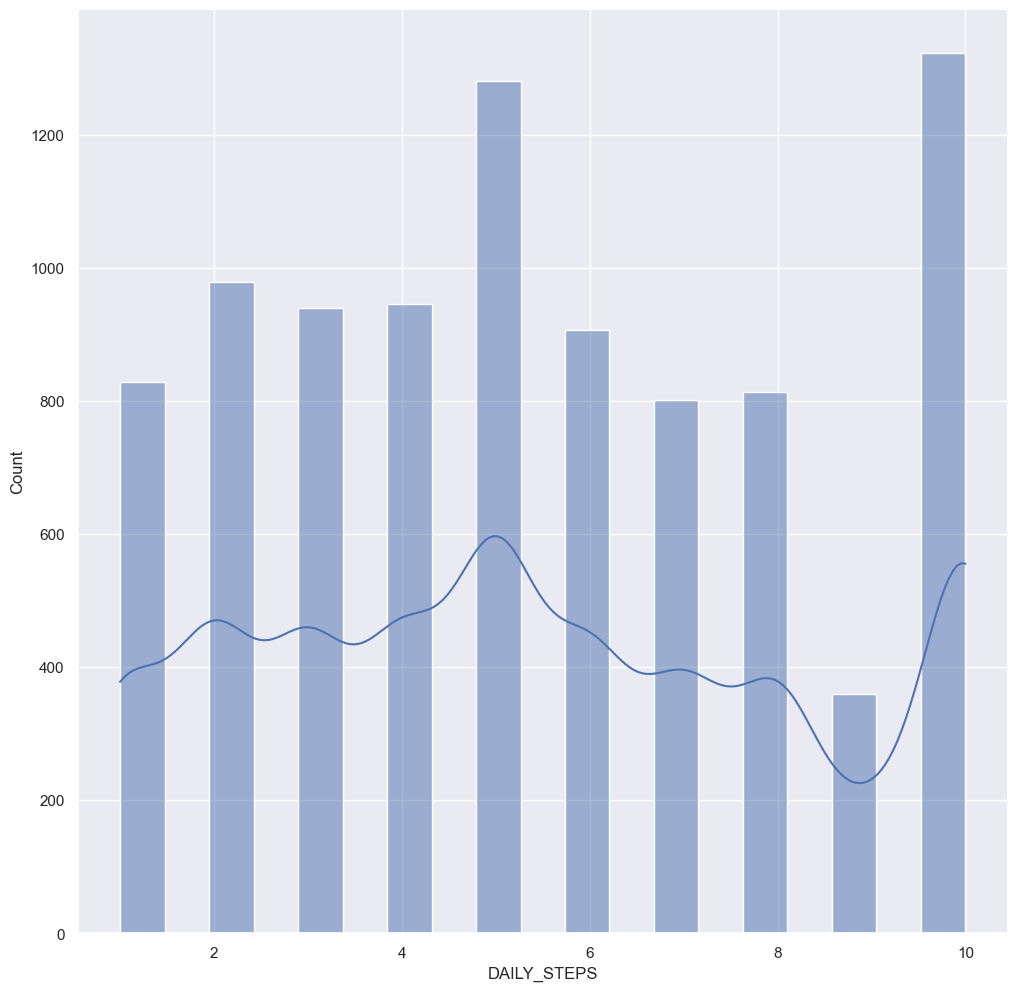

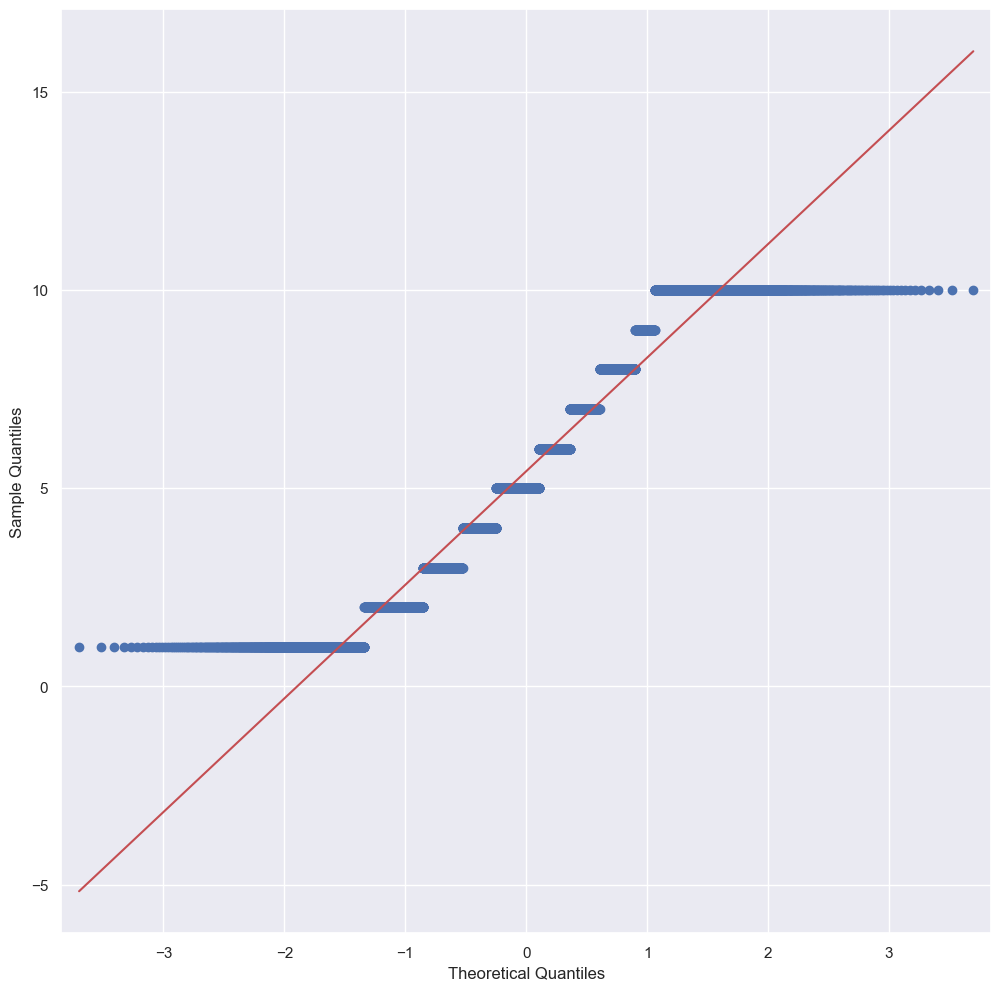

In [16]:
#histogram
sns.histplot(selfEmployed["DAILY_STEPS"], kde=True) 

#q-q plot
sm.qqplot(selfEmployed["DAILY_STEPS"], line='s')

# Plot graphs
plt.show()

#### <u>**Conclusion**</u>
- Histogram
    - 2 Peaks (Center | End)
- Q-Q Plot
    - **Uniformed Distribution** against Normal Distribution

This shows that the Model has many outliers

<hr>

# Graph 8 **(Pie Chart)** - The Distribution of Self-Employed Based on AGE

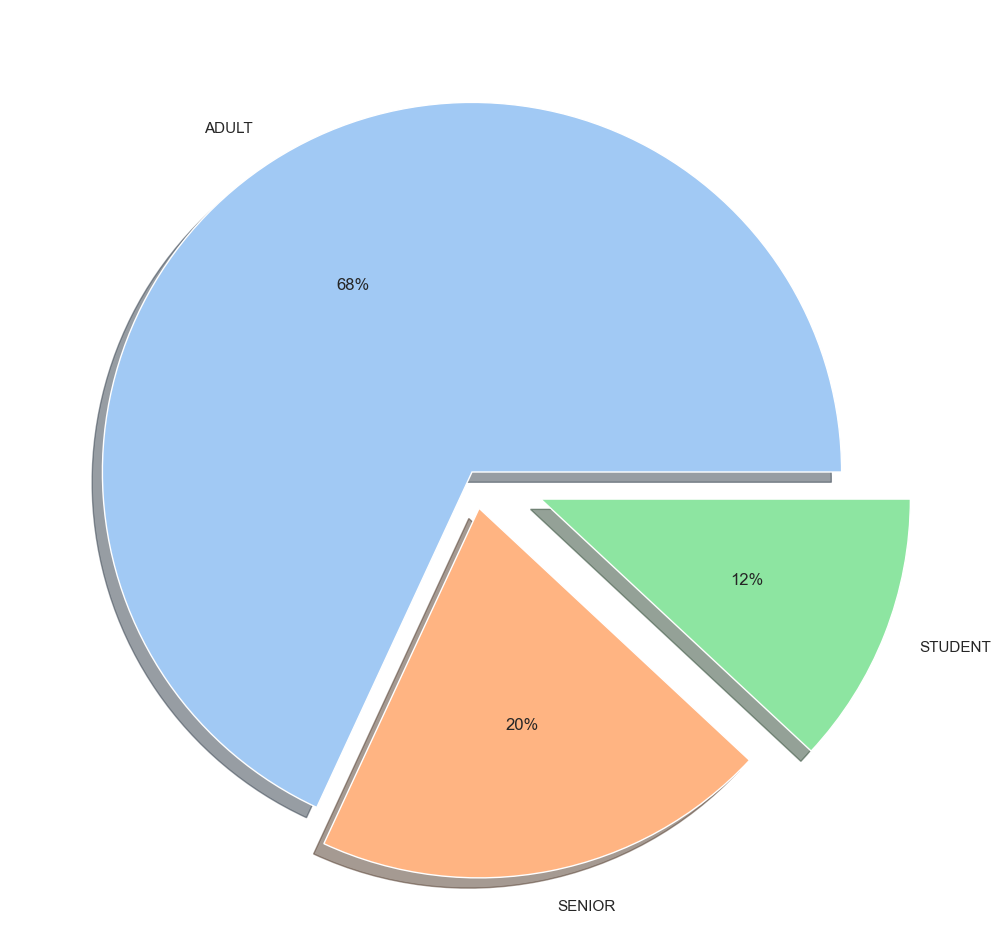

In [17]:
#define data
data = selfEmployed["AGE"].value_counts()
labels = selfEmployed["AGE"].value_counts().index

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, explode=(0,0.1,0.2), autopct='%.0f%%', shadow=True)

plt.show()

<hr>

# Graph 9 **(Bar Graph)** - Most Popular Motivation against the Age Group

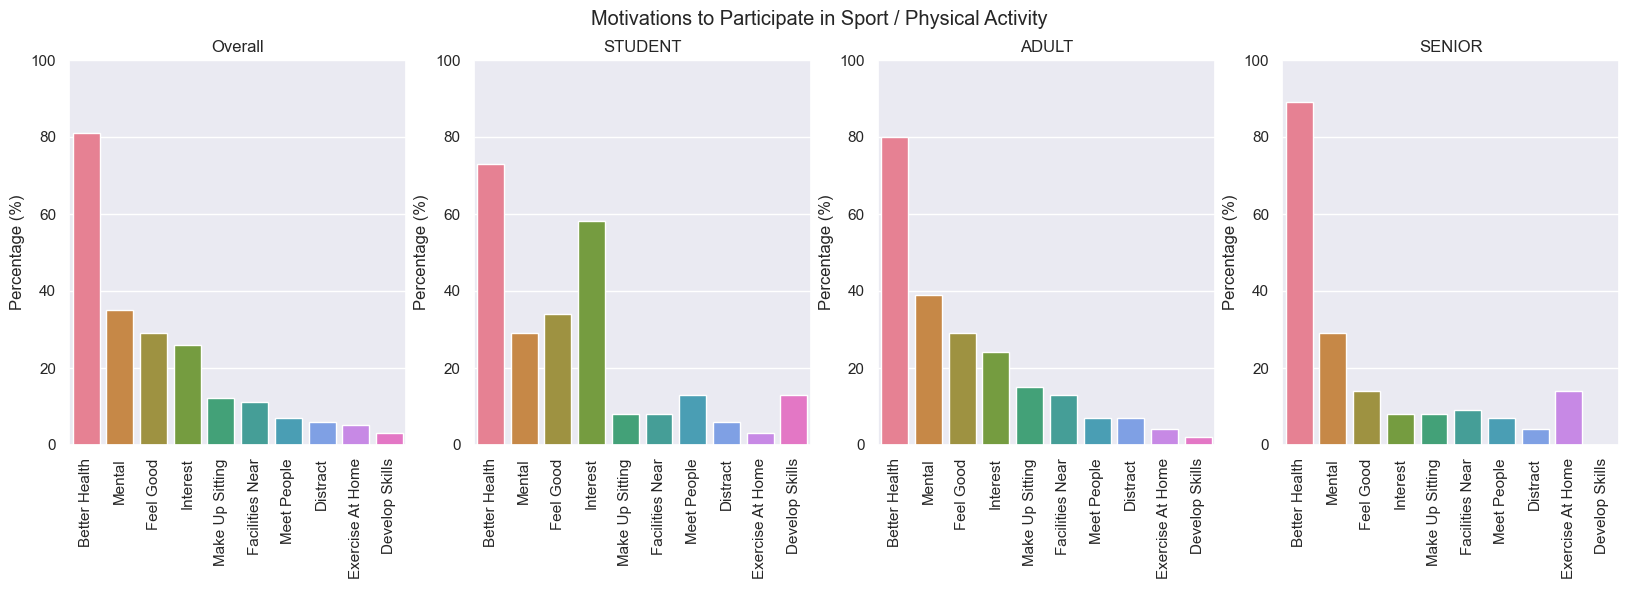

In [18]:
fig, axes = plt.subplots(1,4,figsize=(20,5))
for index, age_group in enumerate(motivation.index[:4]):
    # Barplot
    sns.barplot(data=motivation.loc[age_group],palette="husl", ax=axes[index])

    # Setting Plot
    fig.suptitle('Motivations to Participate in Sport / Physical Activity')
    axes[index].set_title(age_group)
    axes[index].set_ylabel("Percentage (%)")
    axes[index].set_ylim(0, 100)
    axes[index].set_xticklabels(labels=['Better Health','Mental','Feel Good','Interest','Make Up Sitting','Facilities Near','Meet People','Distract','Exercise At Home','Develop Skills'], rotation=90)

plt.show()

#### <u>**Conclusion**</u>
- Overall
    - Most People's Motivation is for Health
- Student
    - Interest as its new to them
- Adult
    - similar to the overall population
- Senior
    - Excise At Home - they stay at home and find excising a good way to keep their mind occupied

### <u>Since Majority of Self Employed is **Adults**, We can focus on Motivations of **Better Health** </u>
In order to make people Have a better WORK_LIFE_BALANCE_SCORE:
- Implement **Subsidies** and **Discounts** on healthier food options to make them more affordable and accessible. 
    - This can help address issues related to food insecurity and promote better nutrition.
- Public Health Campaigns:
    - Launch comprehensive public health campaigns that educate adults on the importance of a healthy lifestyle. <br>
    These campaigns can use various media platforms to reach a wide audience and convey key messages about nutrition, physical activity, and overall well-being.
- [Host Fitness Challenge](https://www.healthhub.sg/programmes/nsc):
    - Singapore recently had a program called National Steps Challenge. Theres a watch to track your steps and you get awards and incentives from it.